In [38]:
import pandas as pd
df = pd.read_csv('BostonHousing.csv')

In [39]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
x = df.drop(columns=['medv'])
y = df['medv']

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential ([
    Input(shape=(x.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear'),
])
model.compile(
    optimizer='adam',
    loss='mse'
)

In [44]:
history=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 614.6154 - val_loss: 497.5905
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 579.0755 - val_loss: 461.6056
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 482.0200 - val_loss: 415.8665
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 429.2918 - val_loss: 355.7579
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 401.8513 - val_loss: 280.1538
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 306.0022 - val_loss: 194.2740
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 210.2789 - val_loss: 116.8092
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 116.5741 - val_loss: 70.2077
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 77.9446 - val_loss: 50.7675
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 57.1253 - val_loss: 41.7779
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 45.5157 - val_loss: 35.9693
Epoch 12/100
13/13 ━━

In [45]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
print(r2(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.8351047185038954
2.333906960019878
12.092394817395743


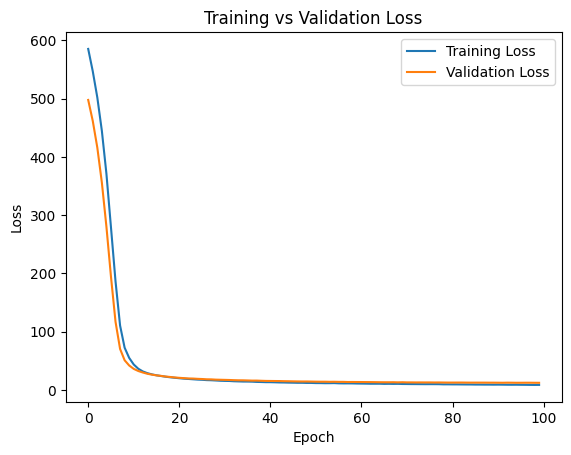

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()